# Read shapefile

Here I show an example of shapefiles that could be used to restrict the user interaction to the plates boundaries.

Data from https://www.arcgis.com/home/item.html?id=f155b76c13c84f62864446847f1ae652

Tutorial of the package "shapefile" from https://pypi.python.org/pypi/pyshp#reading-shapefiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import shapefile

In [3]:
sf = shapefile.Reader("data/plat_lin_proj/plat_lin_proj")

In [4]:
shapes = sf.shapes()
len(shapes)

33

Tell me the attributes of a shape

In [5]:
for name in dir(shapes[3]):
    if not name.startswith('__'):
        print name

bbox
parts
points
shapeType


Draw each shape

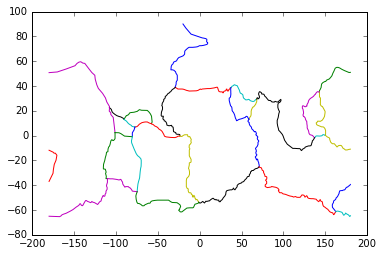

In [6]:
for shp in shapes:
    p = np.array(shp.points)
#     print p.shape
    plt.plot(p[:,0],p[:,1])

I want to draw them in 3D

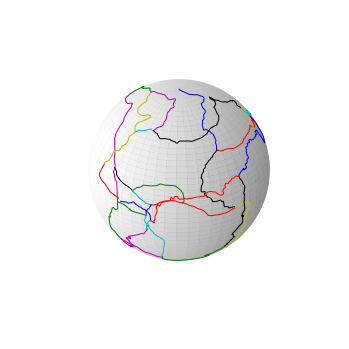

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9*1.5,4*1.5))
ax = fig.add_subplot(111, projection='3d')

#sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
xs = 10 * np.outer(np.cos(u), np.sin(v))
ys = 10 * np.outer(np.sin(u), np.sin(v))
zs = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(xs, ys, zs, rstride=2, cstride=2, color='w', lw=0)


#points
deg2rad=np.pi/180.
for shp in shapes:
    p = np.array(shp.points)    
    xp = 10.*np.cos(p[:,1]*deg2rad)*np.cos(p[:,0]*deg2rad)
    yp = 10.*np.cos(p[:,1]*deg2rad)*np.sin(p[:,0]*deg2rad)
    zp = 10.*np.sin(p[:,1]*deg2rad)

    ax.plot3D(xp,yp,zp)

ax.set_aspect(1)
ax.set_axis_off()

Some lines are not hidden by the surface, but that's because the 3D render is too simple, so it's ok :).